In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Cách 1 Dùng Unstructured


In [3]:
import requests

pdf_url = "https://arxiv.org/pdf/1706.03762"
pdf_path = "attention_is_all_you_need.pdf"

response = requests.get(pdf_url)
with open(pdf_path, 'wb') as f:
    f.write(response.content)
print("Đã tải xong file.")

Đã tải xong file.


In [ ]:
# --- BƯỚC 1: CÀI ĐẶT & RESTART KERNEL (CHỈ CHẠY 1 LẦN) ---
import os

# Cài đặt hệ thống và thư viện
!apt-get install -y poppler-utils tesseract-ocr
!pip install --upgrade "unstructured[all-docs]" pypdfium2 opencv-python pdf2image

# Thông báo và tự động restart kernel để áp dụng thư viện mới
print("\n--- ĐANG RESTART KERNEL ĐỂ CẬP NHẬT THƯ VIỆN... VUI LÒNG ĐỢI 5 GIÂY RỒI CHẠY LẠI BLOCK NÀY ---")
os._exit(0) 


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 120 not upgraded.


In [6]:
# 1. Sửa lỗi version bằng cách cài bản inference ổn định
!pip install unstructured-inference==0.7.36 unstructured.pytesseract
!pip install --upgrade unstructured

import os
from unstructured.partition.pdf import partition_pdf

output_dir = "unstructured_output"
os.makedirs(output_dir, exist_ok=True)
pdf_filename = "attention_is_all_you_need.pdf"

print("Đang xử lý (đã fix lỗi 'element_coords')...")

if os.path.exists(pdf_filename):
    elements = partition_pdf(
        filename=pdf_filename,
        strategy="hi_res",
        # Quay lại YOLOX vì nó ổn định hơn với môi trường hiện tại
        hi_res_model_name="yolox", 
        # Tăng chất lượng ảnh quét để nhận diện bảng tốt hơn
        pdf_image_dpi=300,
        infer_table_structure=True,
        extract_images_in_pdf=True,
        extract_image_block_output_dir=output_dir,
        # Chỉ lấy 5 trang đầu để tiết kiệm RAM và tập trung vào các bảng chính
        hi_res_max_pages=5
    )

    tables = [el for el in elements if el.category == "Table"]
    
    print(f"\n--- KẾT QUẢ ---")
    print(f"Tìm thấy {len(tables)} bảng.")

    if tables:
        for i, table in enumerate(tables):
            print(f"\nBảng {i+1} (HTML):")
            # In ra 500 ký tự đầu của mã HTML bảng
            print(table.metadata.text_as_html[:500] + "...")
    else:
        # Kiểm tra xem có bị nhận nhầm thành Image không
        images = [el for el in elements if el.category == "Image"]
        print(f"Không tìm thấy bảng, nhưng thấy {len(images)} ảnh.")
        print("Gợi ý: Nếu vẫn ra 0 bảng, có thể model AI đang coi bảng là một Figure (Ảnh).")
else:
    print("Vui lòng upload file PDF!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pdfminer_six-20251230-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 92.8 MB/s eta 0:00:00:00:0100:01
Using cached pdfminer_six-20251230-py3-none-any.whl (6.6 MB)
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=79eac9607b62254327b3e521af004ba56685beb28c49d674cf281e35154e8642
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac58d4698048c
Successfully built iopath
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20260107
    Uninstalling pdfminer.six-20260107:
      Successfully uninstalled pdfminer.six-20260107
  Attempting uninstall: unstructured-inference
    Found existing installation: unstructured_inference 1.2.0


--- KIỂM TRA CHI TIẾT KẾT QUẢ ---

[TEXT] Tìm thấy 150 đoạn văn bản.
  - Đoạn 1 (NarrativeText): Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalis...
  - Đoạn 2 (Title): Attention Is All You Need...
  - Đoạn 3 (NarrativeText): Google Brain noam@google.com...
  - Đoạn 4 (NarrativeText): Niki Parmar∗ Google Research nikip@google.com...
  - Đoạn 5 (NarrativeText): Google Research usz@google.com...

[TABLE] Tìm thấy 4 bảng.

--- 📊 Nội dung Bảng 1 (Cấu trúc HTML) ---


Layer Type,Complexity per Layer,Sequential Operations,Maximum Path Length
Self-Attention,O(n? - d),O(1),O(1)
Recurrent,O(n - d?),O(n),O(n)
Convolutional,O(k-n-d?),O(1),"O(log:,(n))"
Self-Attention (restricted),O(r-n-d),O(1),O(n/r)



--- 📊 Nội dung Bảng 2 (Cấu trúc HTML) ---



--- 📊 Nội dung Bảng 3 (Cấu trúc HTML) ---



--- 📊 Nội dung Bảng 4 (Cấu trúc HTML) ---


Dyer et al. (2016) [8] Transformer (4 layers),"WSJ only, discriminative WSJ only, discriminative",91.7 91.3
Zhu et al. (2013) [40],semi-supervised,91.3
Vinyals (2014) [37] Transformer (4 layers),semi-supervised semi-supervised,92.7



[IMAGE] Tìm thấy 11 file ảnh đã trích xuất.


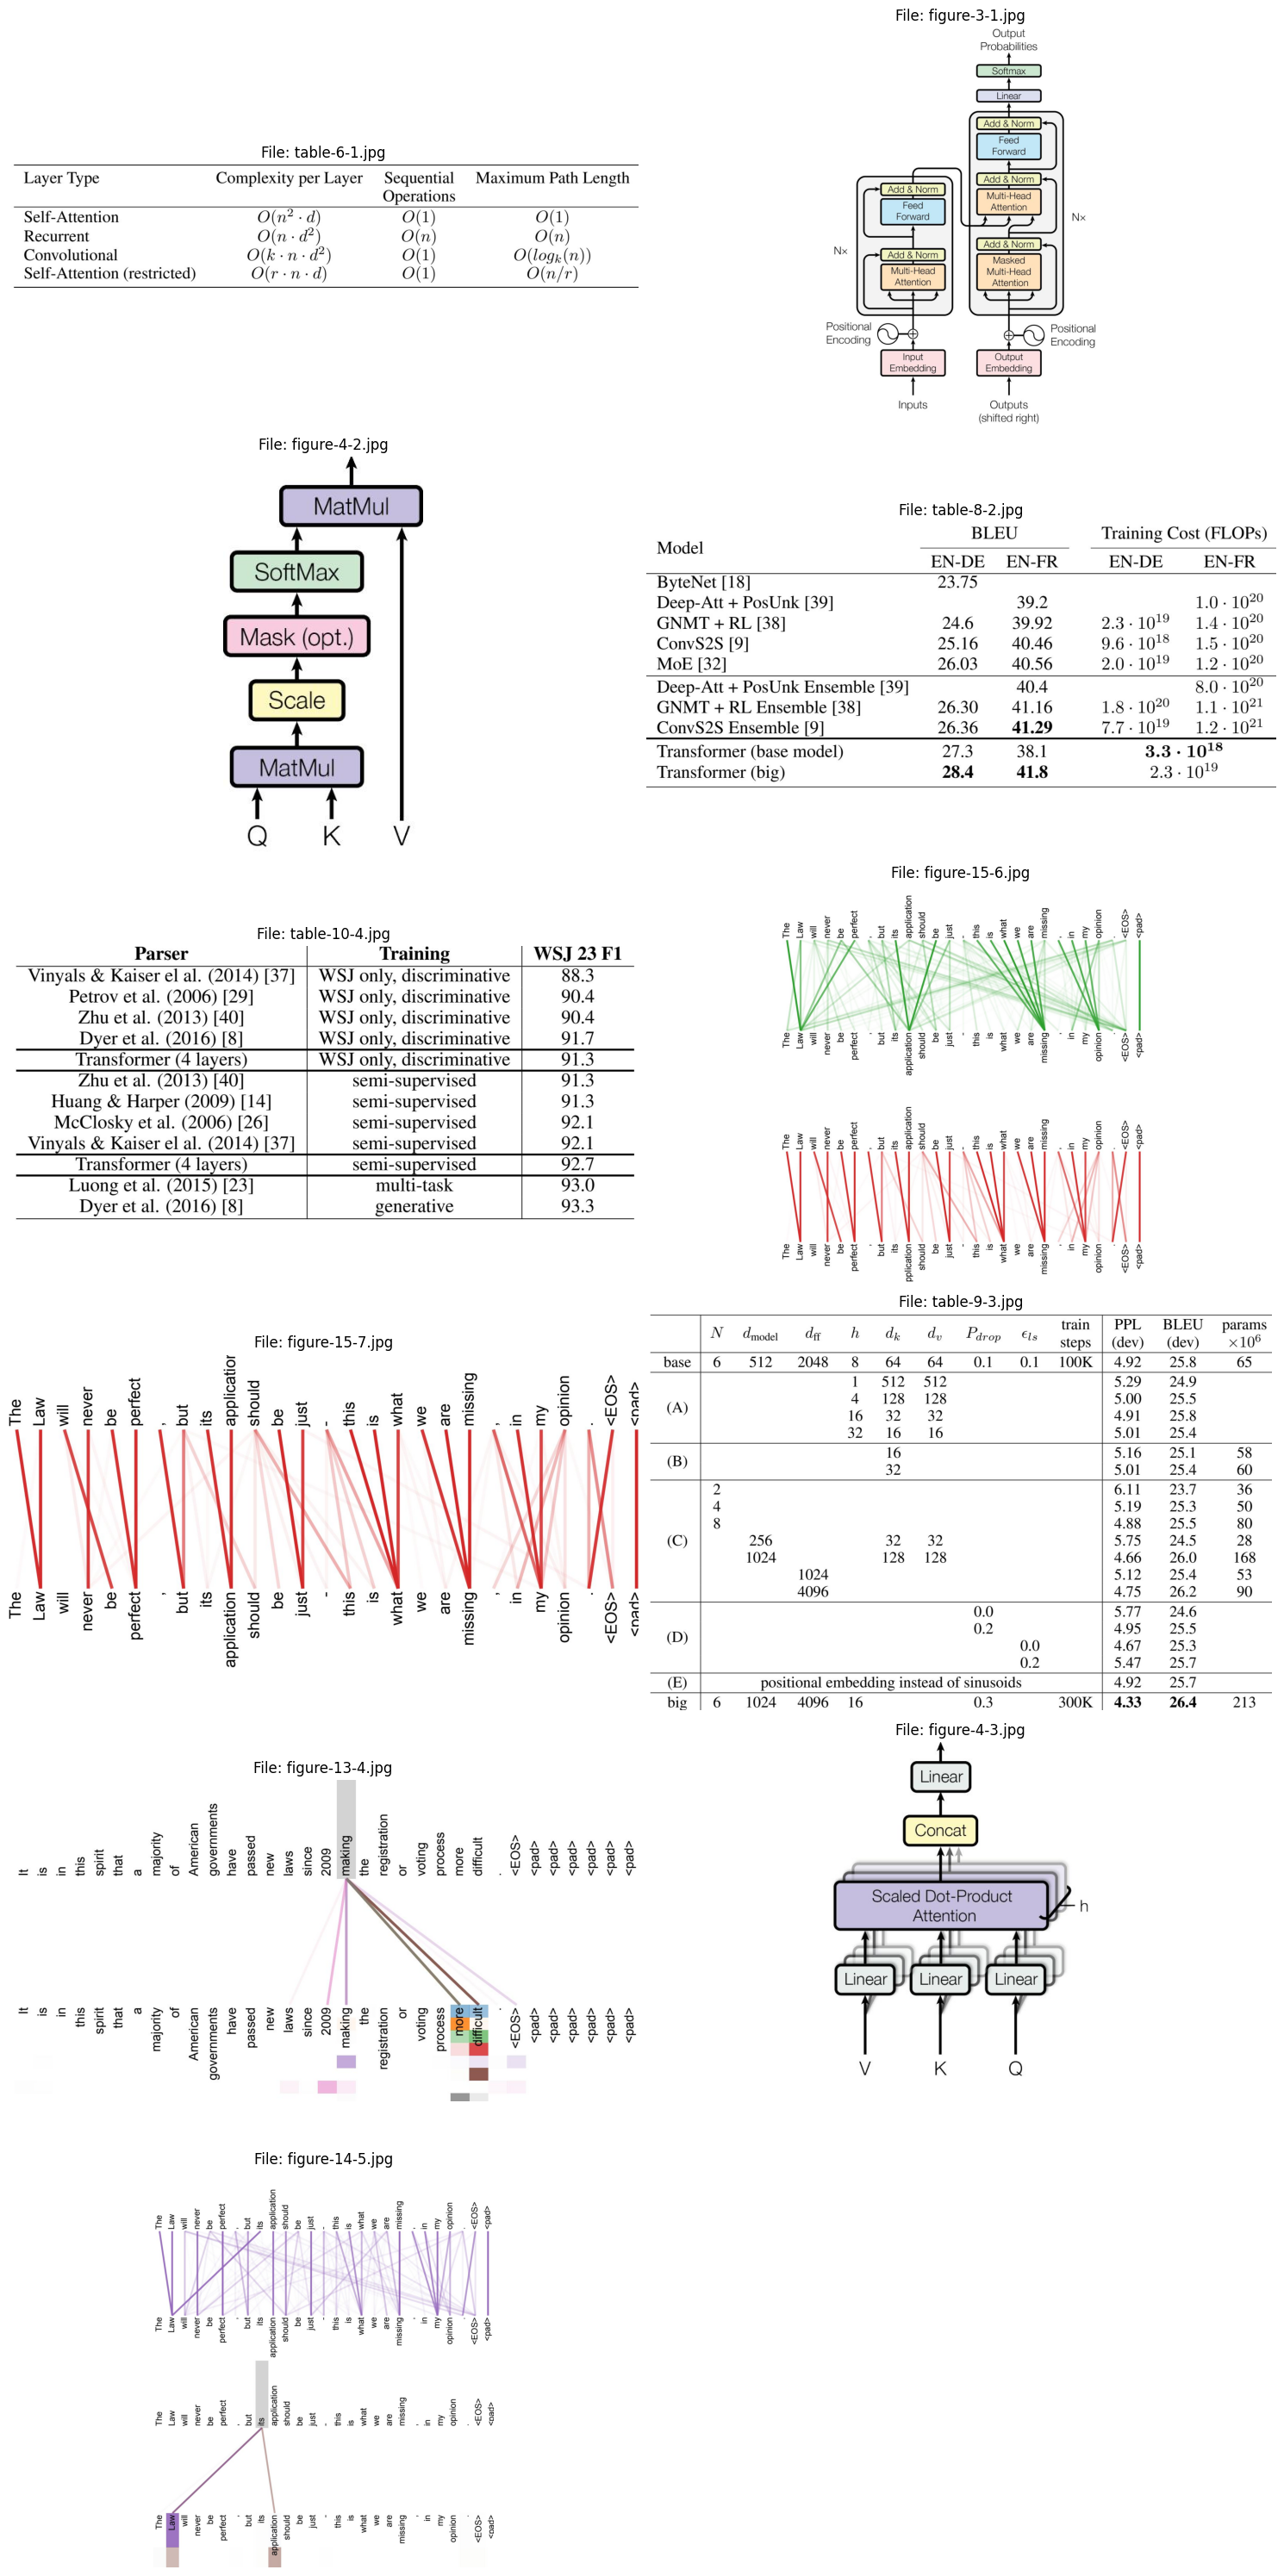


--- ✅ PHÂN TÍCH NHANH ---
✔ Đã nhận diện đúng Table 1 (Complexity per Layer).
✔ Đã trích xuất được các sơ đồ (Figures) từ paper.


In [9]:
from IPython.display import display, HTML
import os
from PIL import Image
import matplotlib.pyplot as plt

print(f"--- KIỂM TRA CHI TIẾT KẾT QUẢ ---")

# 1. KIỂM TRA TEXT (Văn bản thuần túy)
text_elements = [el for el in elements if el.category in ["Title", "NarrativeText", "ListItem"]]
print(f"\n[TEXT] Tìm thấy {len(text_elements)} đoạn văn bản.")
for i, el in enumerate(text_elements[:5]): # Xem thử 5 đoạn đầu
    print(f"  - Đoạn {i+1} ({el.category}): {el.text[:150]}...")

# 2. KIỂM TRA TABLE (Bảng biểu - Hiển thị dạng HTML đẹp)
tables = [el for el in elements if el.category == "Table"]
print(f"\n[TABLE] Tìm thấy {len(tables)} bảng.")
for i, table in enumerate(tables):
    print(f"\n--- 📊 Nội dung Bảng {i+1} (Cấu trúc HTML) ---")
    display(HTML(table.metadata.text_as_html))

# 3. KIỂM TRA IMAGE (Hình ảnh/Sơ đồ - Hiển thị ảnh trực tiếp)
image_files = [f for f in os.listdir(output_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
print(f"\n[IMAGE] Tìm thấy {len(image_files)} file ảnh đã trích xuất.")

if image_files:
    # Thiết kế khung hiển thị ảnh (Grid)
    num_images = len(image_files)
    cols = 2
    rows = (num_images + 1) // cols
    
    plt.figure(figsize=(15, 5 * rows))
    for idx, img_name in enumerate(image_files):
        img_path = os.path.join(output_dir, img_name)
        img = Image.open(img_path)
        
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.title(f"File: {img_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 4. PHÂN TÍCH LOGIC
print(f"\n--- ✅ PHÂN TÍCH NHANH ---")
table_check = any("Complexity" in t.text for t in tables)
if table_check:
    print("✔ Đã nhận diện đúng Table 1 (Complexity per Layer).")
else:
    print("⚠ Cảnh báo: Có bảng nhưng có thể nội dung text bên trong bị nhận diện sai.")

# Kiểm tra xem có hình ảnh quan trọng (Sơ đồ model) không
if any("figure" in f.lower() for f in image_files):
    print("✔ Đã trích xuất được các sơ đồ (Figures) từ paper.")

# Cách 2  dùng docling

--2026-02-13 07:36:48--  https://arxiv.org/pdf/1706.03762.pdf
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.3.42, 151.101.195.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /pdf/1706.03762 [following]
--2026-02-13 07:36:48--  https://arxiv.org/pdf/1706.03762
Reusing existing connection to arxiv.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘attention.pdf’

attention.pdf       100%[===================>]   2.11M  --.-KB/s    in 0.06s   

2026-02-13 07:36:48 (35.9 MB/s) - ‘attention.pdf’ saved [2215244/2215244]

🚀 Đang xử lý file: attention.pdf...
✅ Đã lưu Text tại: /kaggle/working/extracted_data/full_content.md
📊 Tìm thấy 4 bảng.
   -> Đã lưu bảng 1: /kaggle/working/extracted_data/table_1.csv
   -> Đã lưu bảng 2: /kaggle/working/extracted_data/table_2.csv
   -> Đã lưu bảng 3: /kaggle/working/extracted_data/table_3.

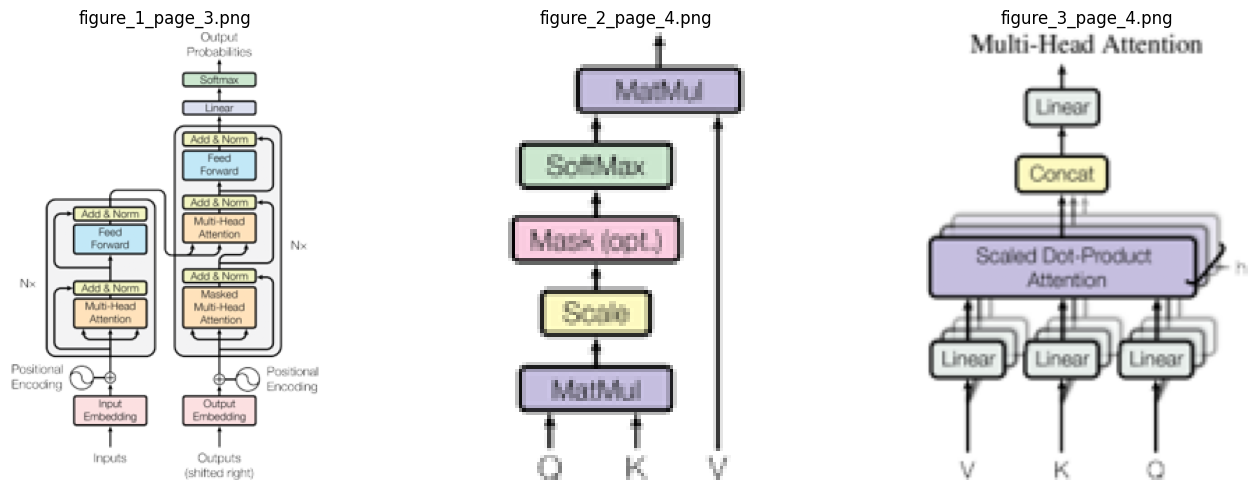

--------------------------------------------------
PREVIEW TEXT (MARKDOWN):
Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

## Attention Is All You Need

Ashish Vaswani ∗ Google Brain avaswani@google.com

Noam Shazeer ∗ Google Brain noam@google.com

Llion Jones ∗ Google Research llion@google.com

Niki Parmar ∗ Google Research nikip@google.com

Aidan N. Gomez ∗ † University of Toronto aidan@cs.toronto.edu

Jakob Uszkoreit ∗ Google Research usz@go...


In [7]:
# ==========================================
# PHẦN 1: CÀI ĐẶT & TẢI FILE
# ==========================================
!pip install docling pandas matplotlib -q
!wget https://arxiv.org/pdf/1706.03762.pdf -O attention.pdf

# ==========================================
# PHẦN 2: XỬ LÝ EXTRACT (FULL CODE)
# ==========================================
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableStructureOptions

# --- 1. Cấu hình đường dẫn ---
PDF_PATH = "attention.pdf"
OUTPUT_DIR = "/kaggle/working/extracted_data"
IMG_DIR = os.path.join(OUTPUT_DIR, "images")
os.makedirs(IMG_DIR, exist_ok=True)

# --- 2. Cấu hình Pipeline ---
pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = False                 # False vì file này là digital text (nhanh hơn)
pipeline_options.do_table_structure = True      # Bật phân tích cấu trúc bảng
pipeline_options.generate_picture_images = True # BẮT BUỘC: Để render ra ảnh bitmap

# --- 3. Khởi tạo Converter ---
# Lưu ý: Phải bọc pipeline_options trong PdfFormatOption (Cập nhật mới nhất của thư viện)
doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

print(f"🚀 Đang xử lý file: {PDF_PATH}...")
# Convert file
result = doc_converter.convert(PDF_PATH)
doc = result.document

# --- 4. XUẤT KẾT QUẢ ---

# A. Extract Text (Markdown)
md_content = doc.export_to_markdown()
with open(f"{OUTPUT_DIR}/full_content.md", "w", encoding="utf-8") as f:
    f.write(md_content)
print(f"✅ Đã lưu Text tại: {OUTPUT_DIR}/full_content.md")

# B. Extract Tables (Lưu ra CSV)
print(f"📊 Tìm thấy {len(doc.tables)} bảng.")
for i, table in enumerate(doc.tables):
    csv_path = f"{OUTPUT_DIR}/table_{i+1}.csv"
    # Cập nhật: Truyền biến 'doc' vào hàm export để tránh Warning
    df = table.export_to_dataframe(doc)
    df.to_csv(csv_path, index=False)
    print(f"   -> Đã lưu bảng {i+1}: {csv_path}")

# C. Extract Images (Lưu ra PNG)
# CẬP NHẬT QUAN TRỌNG: Sử dụng doc.pictures thay vì iterate_items_with_images
image_count = 0
if hasattr(doc, 'pictures') and doc.pictures:
    for i, picture in enumerate(doc.pictures):
        image_count += 1
        
        # Lấy đối tượng ảnh (PIL Image) từ picture item
        image = picture.get_image(doc)
        
        if image:
            # Lấy số trang (nếu có thông tin)
            page_no = picture.prov[0].page_no if picture.prov else 0
            img_filename = f"figure_{image_count}_page_{page_no}.png"
            img_path = os.path.join(IMG_DIR, img_filename)
            
            # Lưu ảnh
            with open(img_path, "wb") as f_img:
                image.save(f_img, "PNG")
else:
    print("⚠️ Không tìm thấy danh sách ảnh (doc.pictures).")

print(f"🖼️  Đã trích xuất {image_count} ảnh vào: {IMG_DIR}")

# ==========================================
# PHẦN 3: KIỂM TRA KẾT QUẢ (VISUALIZATION)
# ==========================================
print("\n=== KẾT QUẢ EXTRACT ===")

# Hiển thị 3 ảnh đầu tiên tìm được
image_files = sorted(glob.glob(f"{IMG_DIR}/*.png"))[:3]

if image_files:
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_files):
        img = mpimg.imread(img_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(img_path))
    plt.tight_layout()
    plt.show()
else:
    print("Không tìm thấy ảnh nào để hiển thị.")

# Hiển thị nội dung text đầu file markdown
print("-" * 50)
print("PREVIEW TEXT (MARKDOWN):")
try:
    with open(f"{OUTPUT_DIR}/full_content.md", "r") as f:
        print(f.read()[:500] + "...") 
except:
    print("Chưa đọc được file text.")

🔍 BẮT ĐẦU KIỂM TRA CHẤT LƯỢNG DỮ LIỆU...

--- 1. KIỂM TRA TEXT (full_content.md) ---
✅ File tồn tại. Kích thước: 47.92 KB
✅ Tổng số ký tự: 48967
✅ Nội dung có vẻ hợp lệ (Tìm thấy đủ các từ khóa quan trọng).

--- TRÍCH ĐOẠN 500 KÝ TỰ ĐẦU TIÊN ---
Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

## Attention Is All You Need

Ashish Vaswani ∗ Google Brain avaswani@google.com

Noam Shazeer ∗ Google Brain noam@google.com

Llion Jones ∗ Google Research llion@google.com

Niki Parmar ∗ Google Research nikip@google.com

Aidan N. Gomez ∗ † University of Toronto aidan@cs.toronto.edu

Jakob Uszkoreit ∗ Google Research usz@go...

--- 2. KIỂM TRA BẢNG BIỂU (CSV) ---
✅ Tìm thấy 4 file CSV.

📄 File: table_1.csv
   - Kích thước: (4, 4) (Dòng x Cột)
   - Preview dữ liệu:


,Layer Type,Complexity per Layer,Sequential Operations,Maximum Path Length
0,Self-Attention,O ( n 2 · d ),O (1),O (1)
1,Recurrent,O ( n · d 2 ),O ( n ),O ( n )
2,Convolutional,O ( k · n · d 2 ),O (1),O ( log k ( n ))



📄 File: table_2.csv
   - Kích thước: (10, 5) (Dòng x Cột)
   - Preview dữ liệu:


,Model.,BLEU.EN-DE,BLEU.EN-FR,Training Cost (FLOPs).EN-DE,Training Cost (FLOPs).EN-FR
0,ByteNet [18],23.75,NaN,NaN,NaN
1,Deep-Att + PosUnk [39],NaN,39.20,NaN,1 . 0 · 10 20
2,GNMT + RL [38],24.60,39.92,2 . 3 · 10 19,1 . 4 · 10 20



📄 File: table_3.csv
   - Kích thước: (20, 13) (Dòng x Cột)
   - Preview dữ liệu:


,Unnamed: 0,N,d model,d ff,h,d k,d v,P drop,ϵ ls,train steps,PPL (dev),BLEU (dev),params × 10 6
0,base,6,512,2048,8,64,64,0.1,0.1,100K,4.92,25.8,65.0
1,NaN,NaN,NaN,NaN,1,512,512,NaN,NaN,NaN,5.29,24.9,NaN
2,NaN,NaN,NaN,NaN,4,128,128,NaN,NaN,NaN,5.00,25.5,NaN



📄 File: table_4.csv
   - Kích thước: (12, 3) (Dòng x Cột)
   - Preview dữ liệu:


,Parser,Training,WSJ 23 F1
0,Vinyals &Kaiser el al. (2014) [37],"WSJ only, discriminative",88.3
1,Petrov et al. (2006) [29],"WSJ only, discriminative",90.4
2,Zhu et al. (2013) [40],"WSJ only, discriminative",90.4



--- 3. KIỂM TRA HÌNH ẢNH ---
✅ Tìm thấy 6 file ảnh.


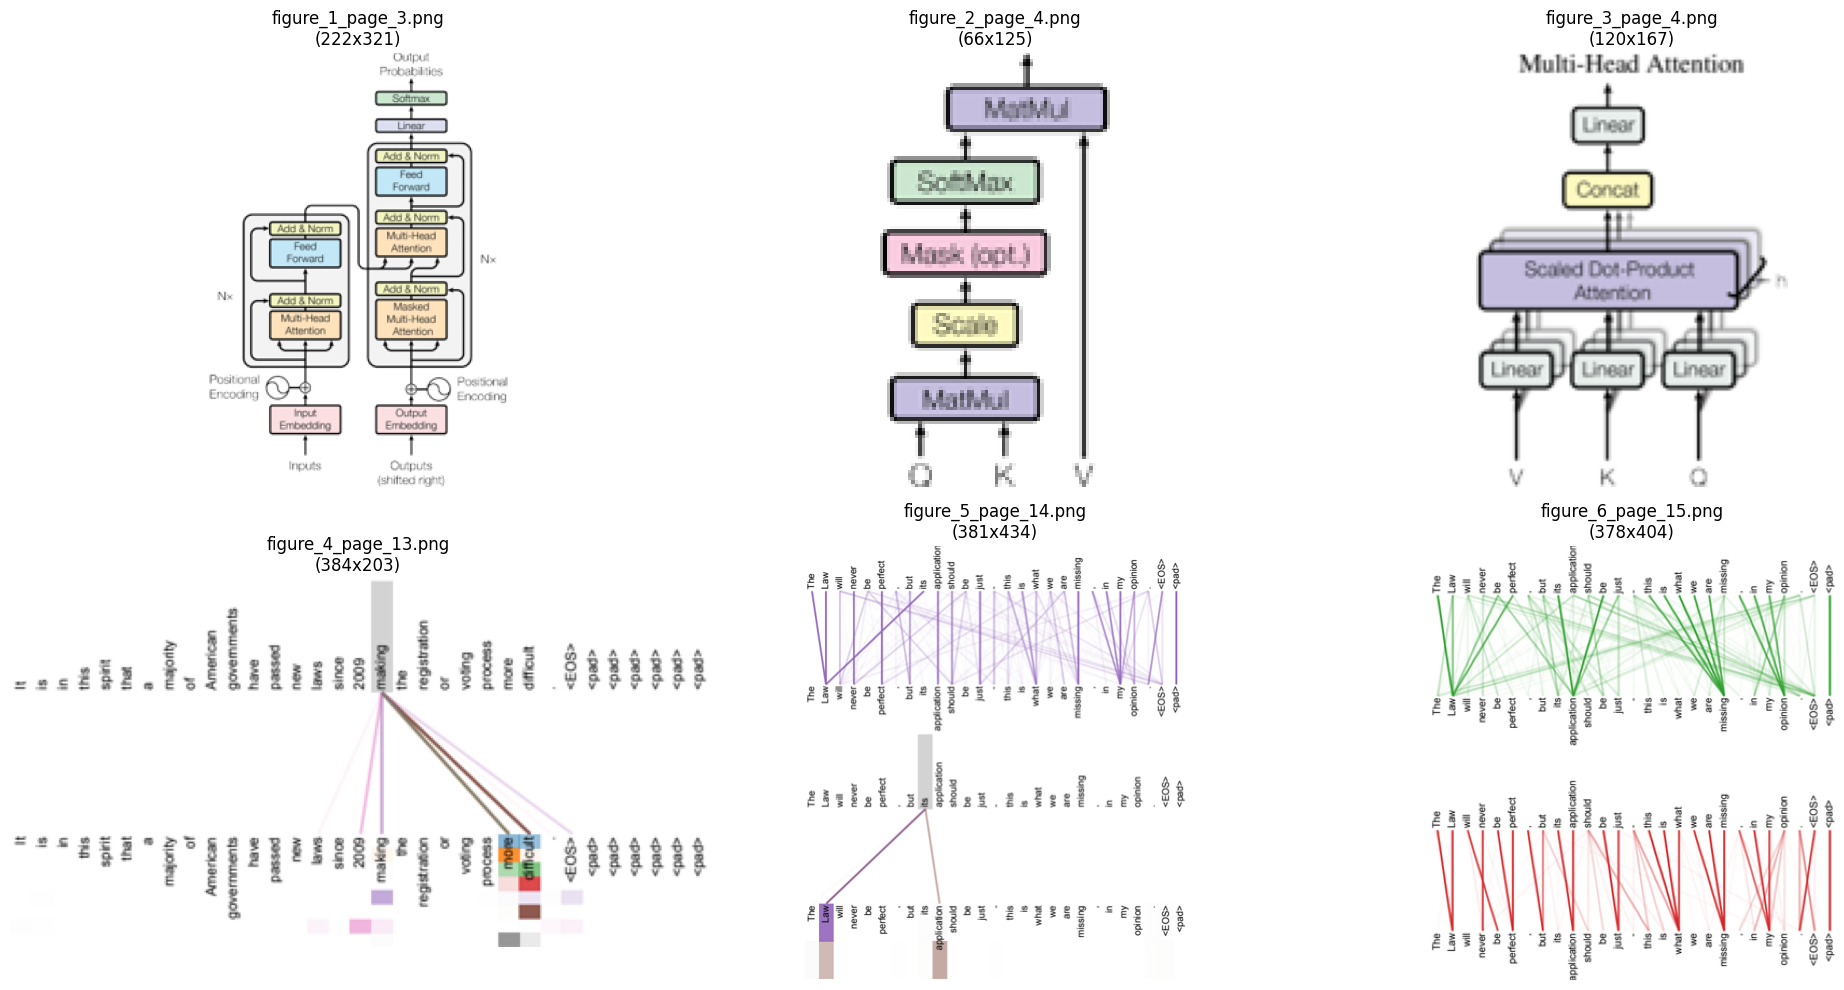


=== HOÀN TẤT KIỂM TRA ===


In [10]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

# --- CẤU HÌNH ĐƯỜNG DẪN (Phải khớp với code trên) ---
OUTPUT_DIR = "/kaggle/working/extracted_data"
IMG_DIR = os.path.join(OUTPUT_DIR, "images")
TEXT_FILE = os.path.join(OUTPUT_DIR, "full_content.md")

print("🔍 BẮT ĐẦU KIỂM TRA CHẤT LƯỢNG DỮ LIỆU...\n")

# ==========================================
# 1. KIỂM TRA TEXT (MARKDOWN)
# ==========================================
print(f"--- 1. KIỂM TRA TEXT ({os.path.basename(TEXT_FILE)}) ---")
if os.path.exists(TEXT_FILE):
    with open(TEXT_FILE, "r", encoding="utf-8") as f:
        content = f.read()
    
    file_size_kb = os.path.getsize(TEXT_FILE) / 1024
    print(f"✅ File tồn tại. Kích thước: {file_size_kb:.2f} KB")
    print(f"✅ Tổng số ký tự: {len(content)}")
    
    # Sanity Check: Kiểm tra xem có các từ khóa quan trọng của bài báo không
    keywords = ["Attention", "Transformer", "model", "BLEU"]
    found_keywords = [kw for kw in keywords if kw in content]
    
    if len(found_keywords) == len(keywords):
        print("✅ Nội dung có vẻ hợp lệ (Tìm thấy đủ các từ khóa quan trọng).")
    else:
        print(f"⚠️ Cảnh báo: Thiếu từ khóa quan trọng. Tìm thấy: {found_keywords}")
    
    print("\n--- TRÍCH ĐOẠN 500 KÝ TỰ ĐẦU TIÊN ---")
    print(content[:500] + "...\n")
else:
    print("❌ LỖI: Không tìm thấy file text!")

# ==========================================
# 2. KIỂM TRA TABLES (CSVs)
# ==========================================
print(f"--- 2. KIỂM TRA BẢNG BIỂU (CSV) ---")
csv_files = sorted(glob.glob(f"{OUTPUT_DIR}/*.csv"))

if csv_files:
    print(f"✅ Tìm thấy {len(csv_files)} file CSV.")
    for csv_path in csv_files:
        try:
            df = pd.read_csv(csv_path)
            print(f"\n📄 File: {os.path.basename(csv_path)}")
            print(f"   - Kích thước: {df.shape} (Dòng x Cột)")
            if df.empty:
                print("   ⚠️ CẢNH BÁO: Bảng rỗng!")
            else:
                # Hiển thị 3 dòng đầu để check header
                print("   - Preview dữ liệu:")
                display(df.head(3)) 
        except Exception as e:
            print(f"   ❌ Lỗi đọc file {csv_path}: {e}")
else:
    print("⚠️ Không tìm thấy file CSV nào (Có thể bài báo không có bảng).")

# ==========================================
# 3. KIỂM TRA HÌNH ẢNH (IMAGES)
# ==========================================
print(f"\n--- 3. KIỂM TRA HÌNH ẢNH ---")
img_files = sorted(glob.glob(f"{IMG_DIR}/*.png"))

if img_files:
    print(f"✅ Tìm thấy {len(img_files)} file ảnh.")
    
    # Hiển thị tối đa 6 ảnh để review nhanh
    num_imgs_to_show = min(6, len(img_files))
    cols = 3
    rows = (num_imgs_to_show + cols - 1) // cols
    
    plt.figure(figsize=(20, 5 * rows))
    
    for i in range(num_imgs_to_show):
        img_path = img_files[i]
        try:
            img = mpimg.imread(img_path)
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{os.path.basename(img_path)}\n({img.shape[1]}x{img.shape[0]})")
        except Exception as e:
            print(f"❌ Lỗi hiển thị ảnh {img_path}: {e}")
            
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy file ảnh nào.")

print("\n=== HOÀN TẤT KIỂM TRA ===")